Vinecia Haugsness **"K-State Honor Code "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work.**

# Word2Vec Deep Learning - Advanced Text Classification

https://github.com/vineciah/670

# SECTION1

### Word2Vec

"Recently, Google developed a method called Word2Vec that captures the context of words, while at the same time reducing the size of the data. Word2Vec is actually two different methods: 

###### Figure 1 LEFT:  In the CBOW method, the goal is to predict a word given the surrounding words. 
###### Figure 1 RIGHT:  SKIP-GRAM is the converse - we want to predict a window of words given a single word  

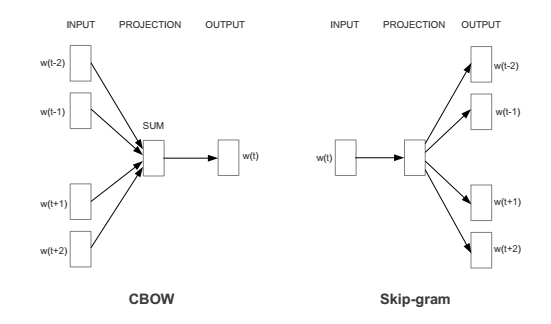

In [1]:
from IPython.display import Image
Image("word.jpg")

Both methods use artificial neural networks as their classification algorithm. Initially, each word in the vocabulary is a random N-dimensional vector. During training, the algorithm learns the optimal vector for each word using the CBOW or Skip-gram method."

https://districtdatalabs.silvrback.com/modern-methods-for-sentiment-analysis

### Doc2Vec

However, even with the above method of averaging word vectors, we are ignoring word order. As a way to summarize bodies of text of varying length, Quoc Le and Tomas Mikolov came up with the Doc2Vec method. This method is almost identical to Word2Vec, except we now generalize the method by adding a paragraph/document vector. Like Word2Vec, there are two methods: 

###### Figure 2 LEFT:  Distributed Memory (DM) DM attempts to predict a word given its previous words and a paragraph vector. Even though the context window moves across the text, the paragraph vector does not (hence distributed memory) and allows for some word-order to be captured. 
###### Figure 2 RIGHT:  Distributed Bag of Words (DBOW).  DBOW predicts a random group of words in a paragraph given only its paragraph vector and 

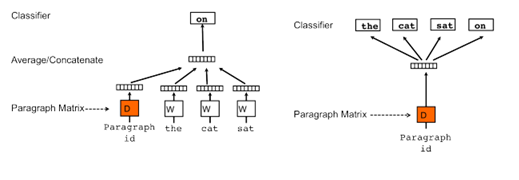

In [2]:
from IPython.display import Image
Image("doc.jpg")

# SECTION2
## TODO:
Dowload GoogleNews-Vectors from:   (warning 1.5 GB download)
https://github.com/lipiji/world2vec

Expand the zip and put in your data folder

In [3]:
import gensim.models.keyedvectors as word2vec

#IMPORTING THE GOOGLENEWS VECTOR FOR TESTING
embed_map = word2vec.KeyedVectors.load_word2vec_format('data/GoogleNews-vectors-negative300.bin', binary=True)

In [4]:
# This will give the total number of words in the vocabolary created from this dataset, and # of Features 
embed_map.syn0.shape

/Users/vinecia1/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  


(3000000, 300)

###### This dataset has a vocabulary of 3mil words and 300 features

### Using Googlenews Vector and doing word comparisons:

In [5]:
#USING GOOGLENEWS VECTOR - CAN SEE INTERESTING CORRELATIONSHIPS BETWEEN WORDS
embed_map.most_similar(positive=['woman', 'king'], negative=['man'], topn=5)


[(u'queen', 0.7118192911148071),
 (u'monarch', 0.6189674735069275),
 (u'princess', 0.5902431011199951),
 (u'crown_prince', 0.549946129322052),
 (u'prince', 0.5377321243286133)]

In [6]:
embed_map.most_similar_cosmul(positive=['woman', 'king'], negative=['man'], topn=5)

[(u'queen', 0.9314123392105103),
 (u'monarch', 0.858533501625061),
 (u'princess', 0.8476566076278687),
 (u'Queen_Consort', 0.8150269985198975),
 (u'queens', 0.8099815249443054)]

###### "Most_similar" 3CosAdd being a linear sum, allows one large similarity term to dominate the expression. It ignores that each term reflects a different aspect of similarity, and the different aspects have different scales.     Using cosine similiarity of a word vector.

###### "Most_similiar_cosmul" 3CosMul, on the other hand - amplifies the differences between small quantities and reduces the differences between larger ones.   Using multpilicative combination objective propopsed by Omer Levy and Yoav Goldberg.

https://stackoverflow.com/questions/31524898/gensim-word2vec-semantic-similarity

In [7]:
#USING GOOGLENEWS VECTOR - CAN SEE INTERESTING CORRELATIONSHIPS BETWEEN WORDS
embed_map.most_similar(positive=['biggest', 'small'], negative=['big'], topn=5)


[(u'smallest', 0.6086567044258118),
 (u'largest', 0.6007465720176697),
 (u'tiny', 0.5387297868728638),
 (u'large', 0.4569440186023712),
 (u'minuscule', 0.434019535779953)]

In [8]:
embed_map.most_similar_cosmul(positive=['biggest', 'small'], negative=['big'], topn=5)

[(u'smallest', 0.8402109742164612),
 (u'largest', 0.8214190602302551),
 (u'tiny', 0.7792864441871643),
 (u'large', 0.7380102276802063),
 (u'fastest_growing', 0.7329541444778442)]

#### It is interesting to run the similiar commands with the same variables.    The outputs are similiar,  but the percentage of match is much stronger with cosmul.

In [9]:
#USING GOOGLENEWS VECTOR - CAN SEE INTERESTING CORRELATIONSHIPS BETWEEN WORDS
embed_map.most_similar(positive=['ate', 'speak'], negative=['eat'], topn=5)


[(u'spoke', 0.6965223550796509),
 (u'speaking', 0.626129150390625),
 (u'conversed', 0.5754593014717102),
 (u'spoken', 0.5704883337020874),
 (u'speaks', 0.5630601644515991)]

In [10]:
embed_map.most_similar_cosmul(positive=['ate', 'speak'], negative=['eat'], topn=5)


[(u'spoke', 0.9444055557250977),
 (u'speaking', 0.8719349503517151),
 (u'conversed', 0.8578439354896545),
 (u'spoken', 0.8389401435852051),
 (u'speaks', 0.831521213054657)]

In [11]:
#USING GOOGLENEWS VECTOR - CAN SEE INTERESTING CORRELATIONSHIPS BETWEEN WORDS
embed_map.most_similar(positive=['Topeka', 'Colorado'], negative=['city'], topn=5)


[(u'Kansas', 0.619242787361145),
 (u'Wichita', 0.6071553826332092),
 (u'Olathe', 0.5803784728050232),
 (u'Oklahoma', 0.5793970823287964),
 (u'Denver', 0.5729305148124695)]

In [12]:
embed_map.most_similar_cosmul(positive=['Topeka', 'Colorado'], negative=['city'], topn=5)


[(u'Kansas', 1.1990258693695068),
 (u'Rocky_Mountain', 1.187031626701355),
 (u'Wichita', 1.1578586101531982),
 (u'South_Dakota', 1.146045207977295),
 (u'Oklahoma', 1.142177700996399)]

#### I find it peculiar that these results have values greater than one!  

In [13]:
embed_map.doesnt_match("breakfast cereal dinner lunch".split())

'cereal'

#### One of these things is not like the other.... Cereal!

In [14]:
embed_map.similarity('woman', 'man')


0.7664012230995352

In [15]:
embed_map.similarity('woman', 'girl')

0.7494640637680033

In [16]:
embed_map.similarity('woman', 'chair')

0.12728428713269194

In [17]:
embed_map.rank('woman', 'man')

1

In [18]:
embed_map.rank('woman', 'girl')

2

In [19]:
embed_map.rank('woman', 'chair')

729458

#### I found it interesting to look at similiarity and rankings between words.     Clearly man/woman,   woman/girl are much more similiar than the woman/chair comparison.   Exponentially so!

In [20]:
# This will print the most similar words present in the model
embed_map.most_similar("man", topn=5)

[(u'woman', 0.7664012908935547),
 (u'boy', 0.6824870705604553),
 (u'teenager', 0.6586930751800537),
 (u'teenage_girl', 0.6147903800010681),
 (u'girl', 0.5921714901924133)]

#### I think its interesting to see that woman/man is rated closer than woman/girl.    Also that "teenage_girl" rates higher than "girl"  

In [21]:
#Returns entities that are closer to entity1 than entity2 is to entity1.
embed_map.closer_than('woman', 'boy')

[u'man',
 u'mother',
 u'girl',
 u'teenager',
 u'lady',
 u'teenage_girl',
 u'policewoman',
 u'teenaged_girl']

In [22]:
#Compute distance between vectors of two input entities
embed_map.distance('woman','man')

0.23359877690046482

In [23]:
embed_map.distance('woman','chair')

0.8727157128673081

#### Clearly "woman" and "man" are more similiar thatan "woman" and "chair" - therefore you can see the greater and lesser distance inbetween them.

# SECTION3  TSNE

"t-distributed Stochastic Neighbor Embedding.

t-SNE is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results."

http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

## TODO:
### 3 word lists

Text documents have been provided in your data folder:  
    food.txt    
    weather.txt     
    sports.txt

Gathered from  http://www.enchantedlearning.com/wordlist/

In [24]:
import numpy as np

# importing data

with open('data/food.txt', 'r') as infile:
    food_words = infile.readlines()

with open('data/sports.txt', 'r') as infile:
    sports_words = infile.readlines()

with open('data/weather.txt', 'r') as infile:
    weather_words = infile.readlines()

#Creating vectors
    
def getWordVecs(words):
    vecs = []
    for word in words:
        word = word.replace('\n', '')
        try:
            vecs.append(embed_map[word].reshape((1,300)))
        except KeyError:
            continue
    vecs = np.concatenate(vecs)
    return np.array(vecs, dtype='float') #TSNE expects float type values

food_vecs = getWordVecs(food_words)
sports_vecs = getWordVecs(sports_words)
weather_vecs = getWordVecs(weather_words)

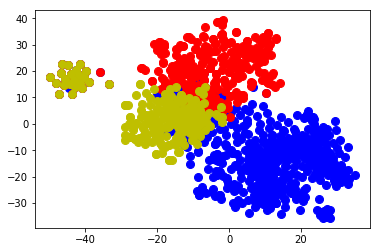

In [25]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

%matplotlib inline

# Creating TSNE Display

ts = TSNE(2)
reduced_vecs = ts.fit_transform(np.concatenate((food_vecs, sports_vecs, weather_vecs)))

#color points by word group to see if Word2Vec can separate them
for i in range(len(reduced_vecs)):
    if i < len(food_vecs):
        #food words colored blue
        color = 'b'
    elif i >= len(food_vecs) and i < (len(food_vecs) + len(sports_vecs)):
        #sports words colored red
        color = 'r'
    else:
        #weather words colored green
        color = 'y'
    plt.plot(reduced_vecs[i,0], reduced_vecs[i,1], marker='o', color=color, markersize=8)    

T-SNE projected clusters of food words (blue), sports words (red), and weather words (yellow).

We can see from the above that Word2Vec does a good job of separating unrelated words, as well as clustering together like words.

#### Limitations of T-SNE

* Computationally Heavy - its applicability is limited to data sets with only a few thousand input objects; beyond that, learning becomes too slow to be practical
* In case of very high dimensional data, you may need to apply another dimensionality reduction technique before using t-SNE

https://medium.com/@luckylwk/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

# SECTION 4

Receiving Operating Characteristic, or ROC

http://blog.yhat.com/posts/roc-curves.html

"is a visual way for inspecting the performance of a binary classifier (0/1). In particular, it's comparing the rate at which your classifier is making correct predictions (True Positives or TP) and the rate at which your classifier is making false alarms (False Positives or FP). "

###### How to read a ROC 

What a ROC curve look like when you are:  <br/>
Guessing<br/>
Perfect Classifier<br/>
Bad = WORSE than guessing<br/>
OK = BETTER than guessing<br/>
GOOD!<br/>

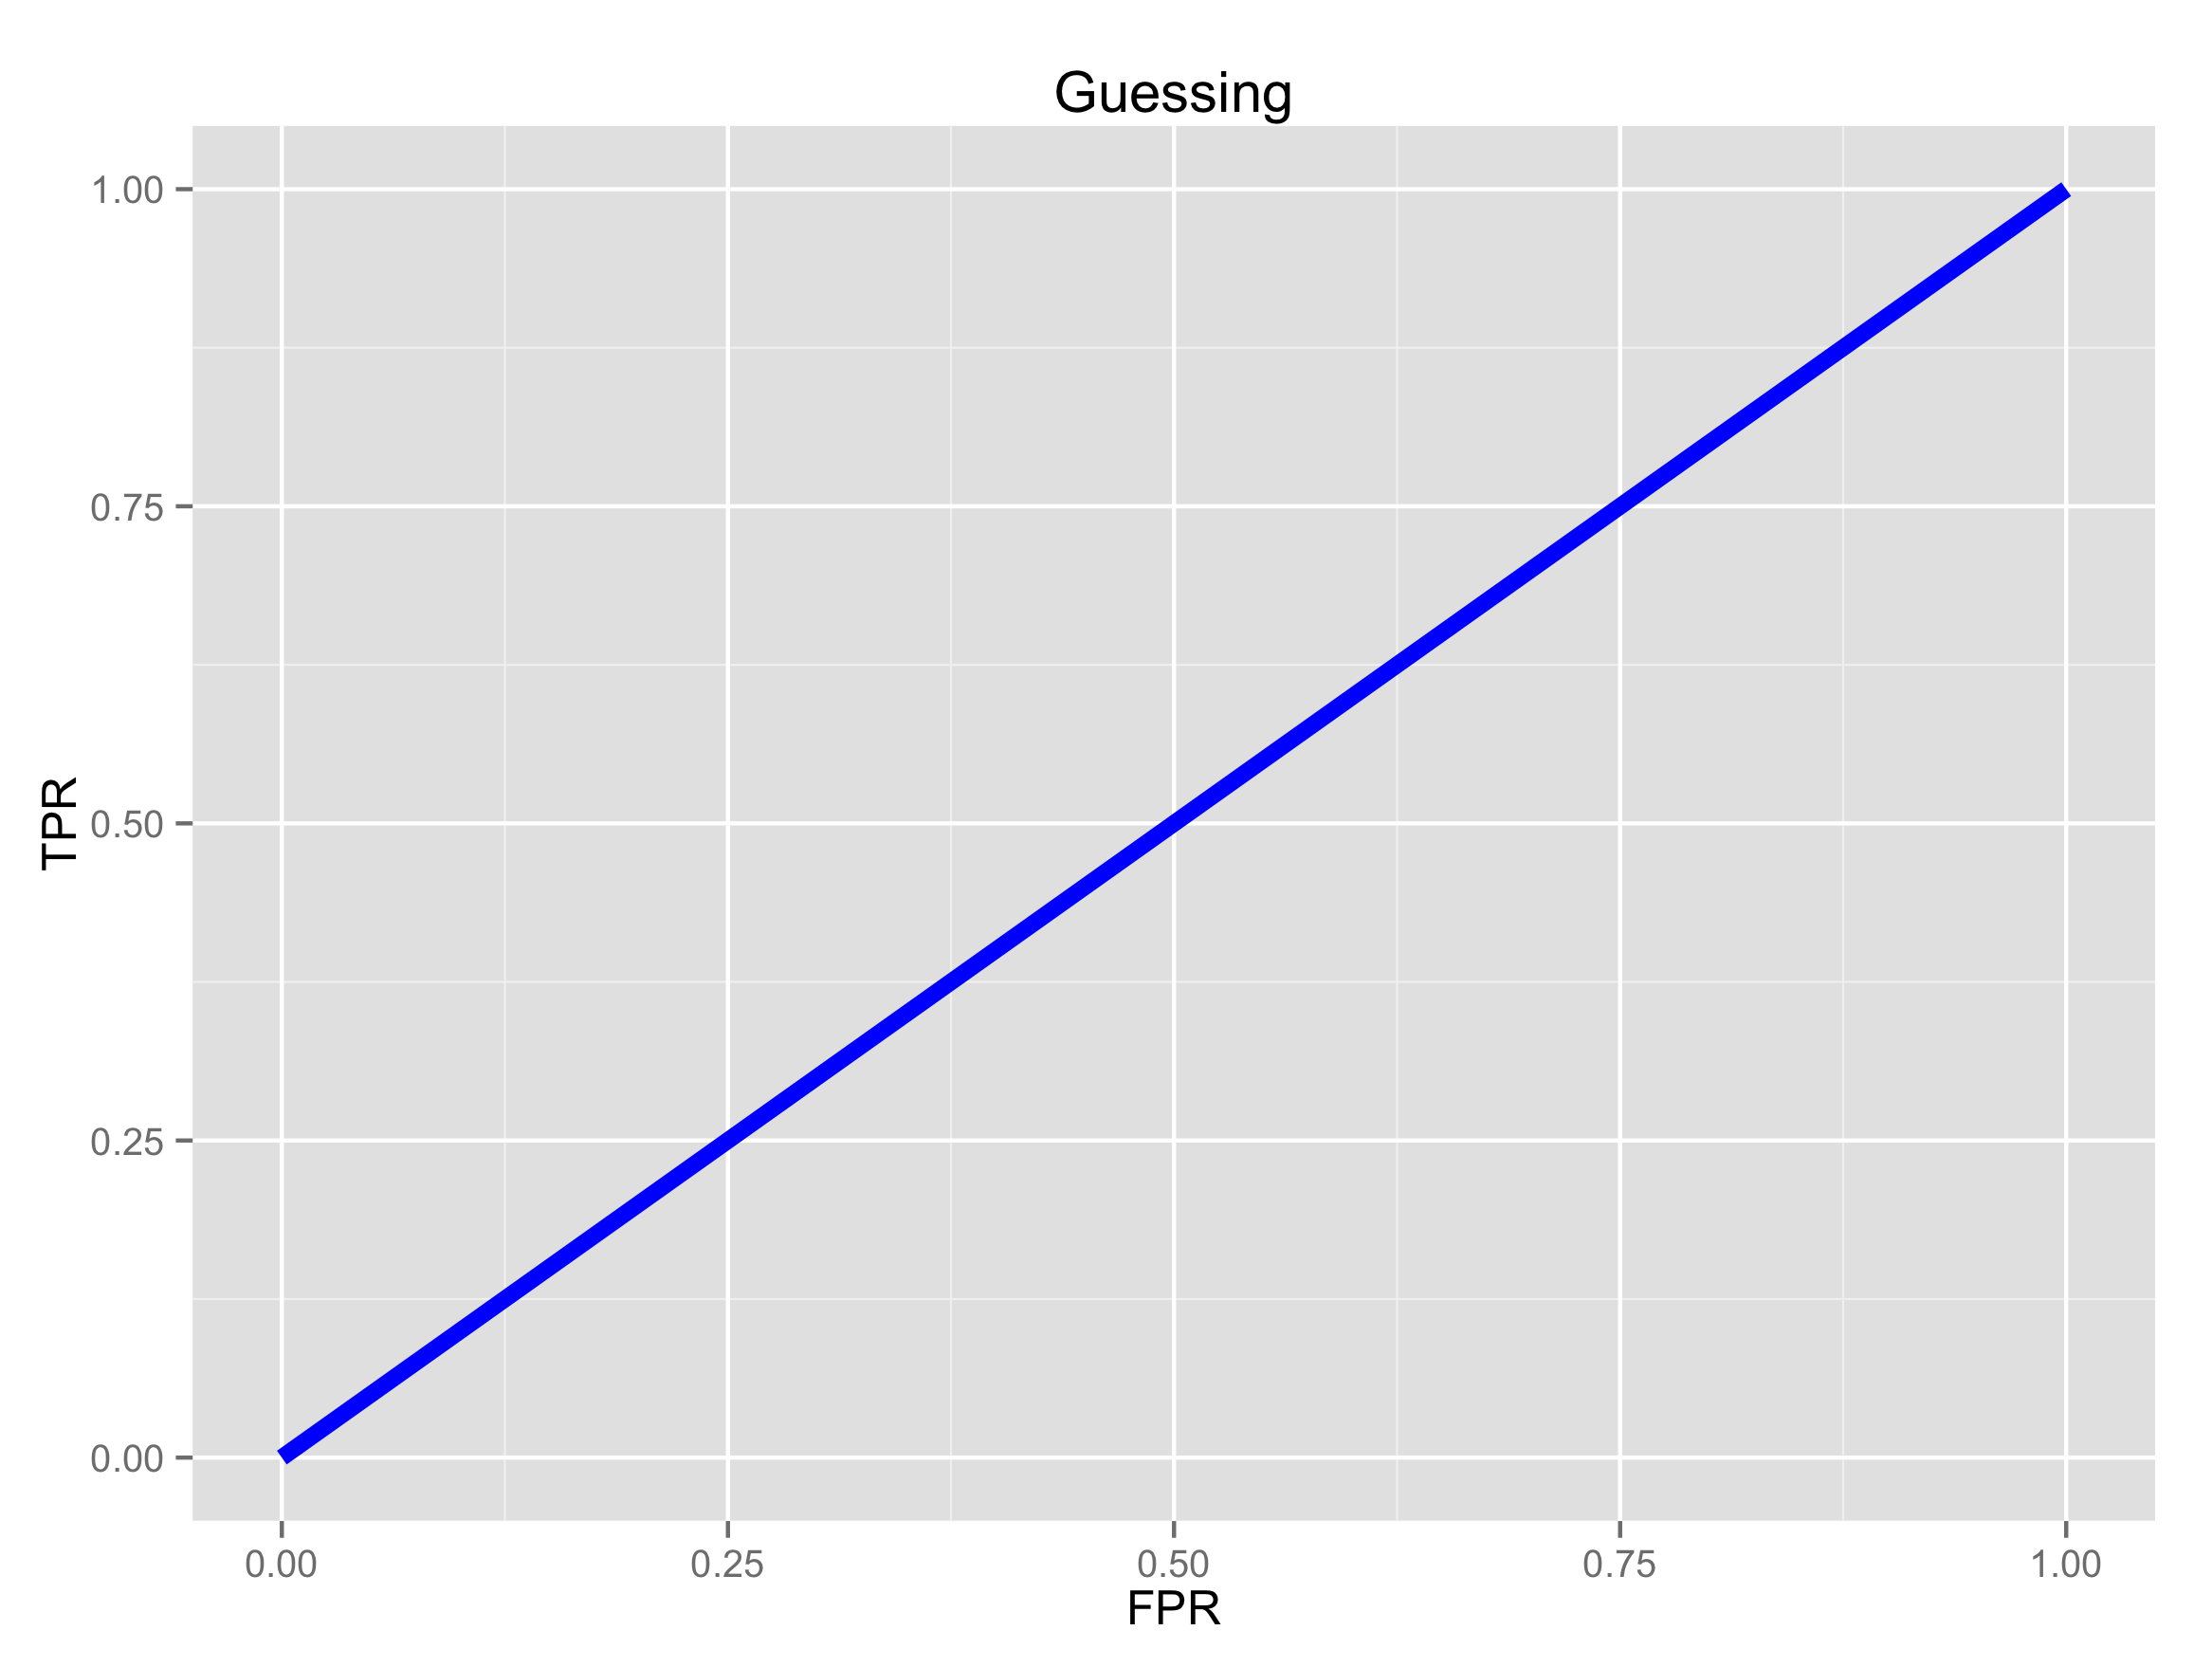

In [26]:
from IPython.display import Image
Image("data/roc-guessing.jpg")

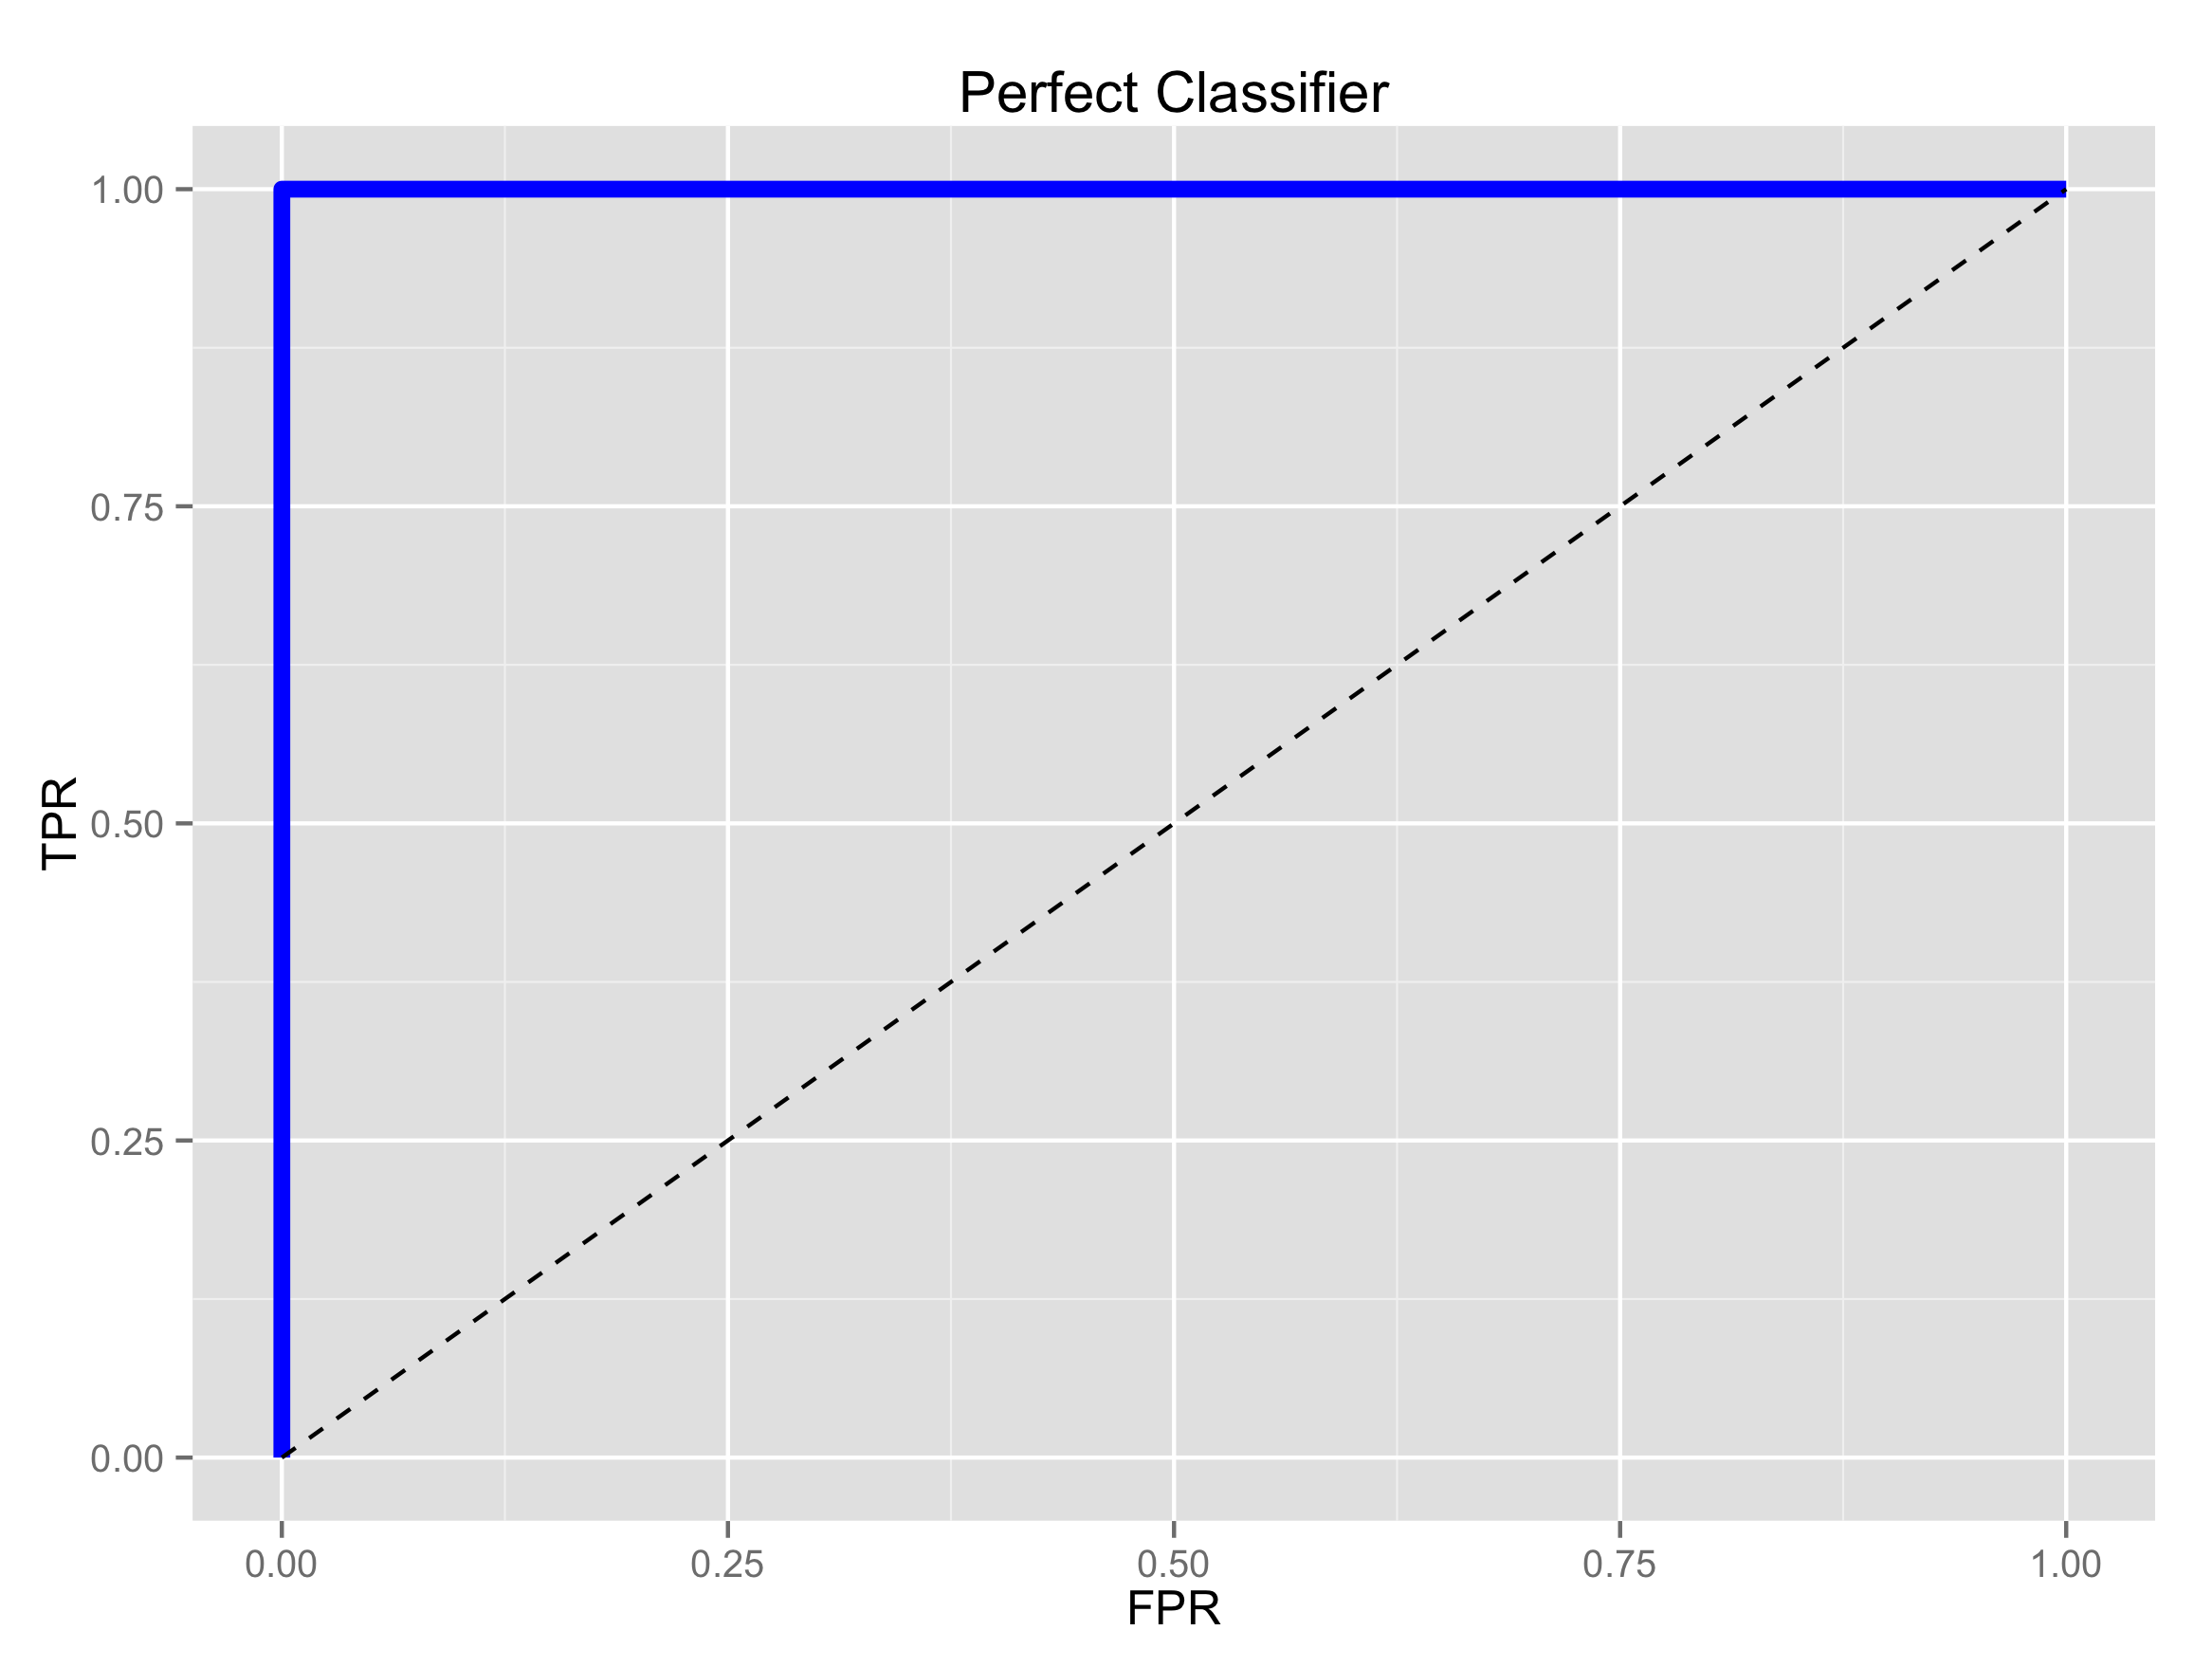

In [27]:
from IPython.display import Image
Image("data/roc-perfect.jpg")

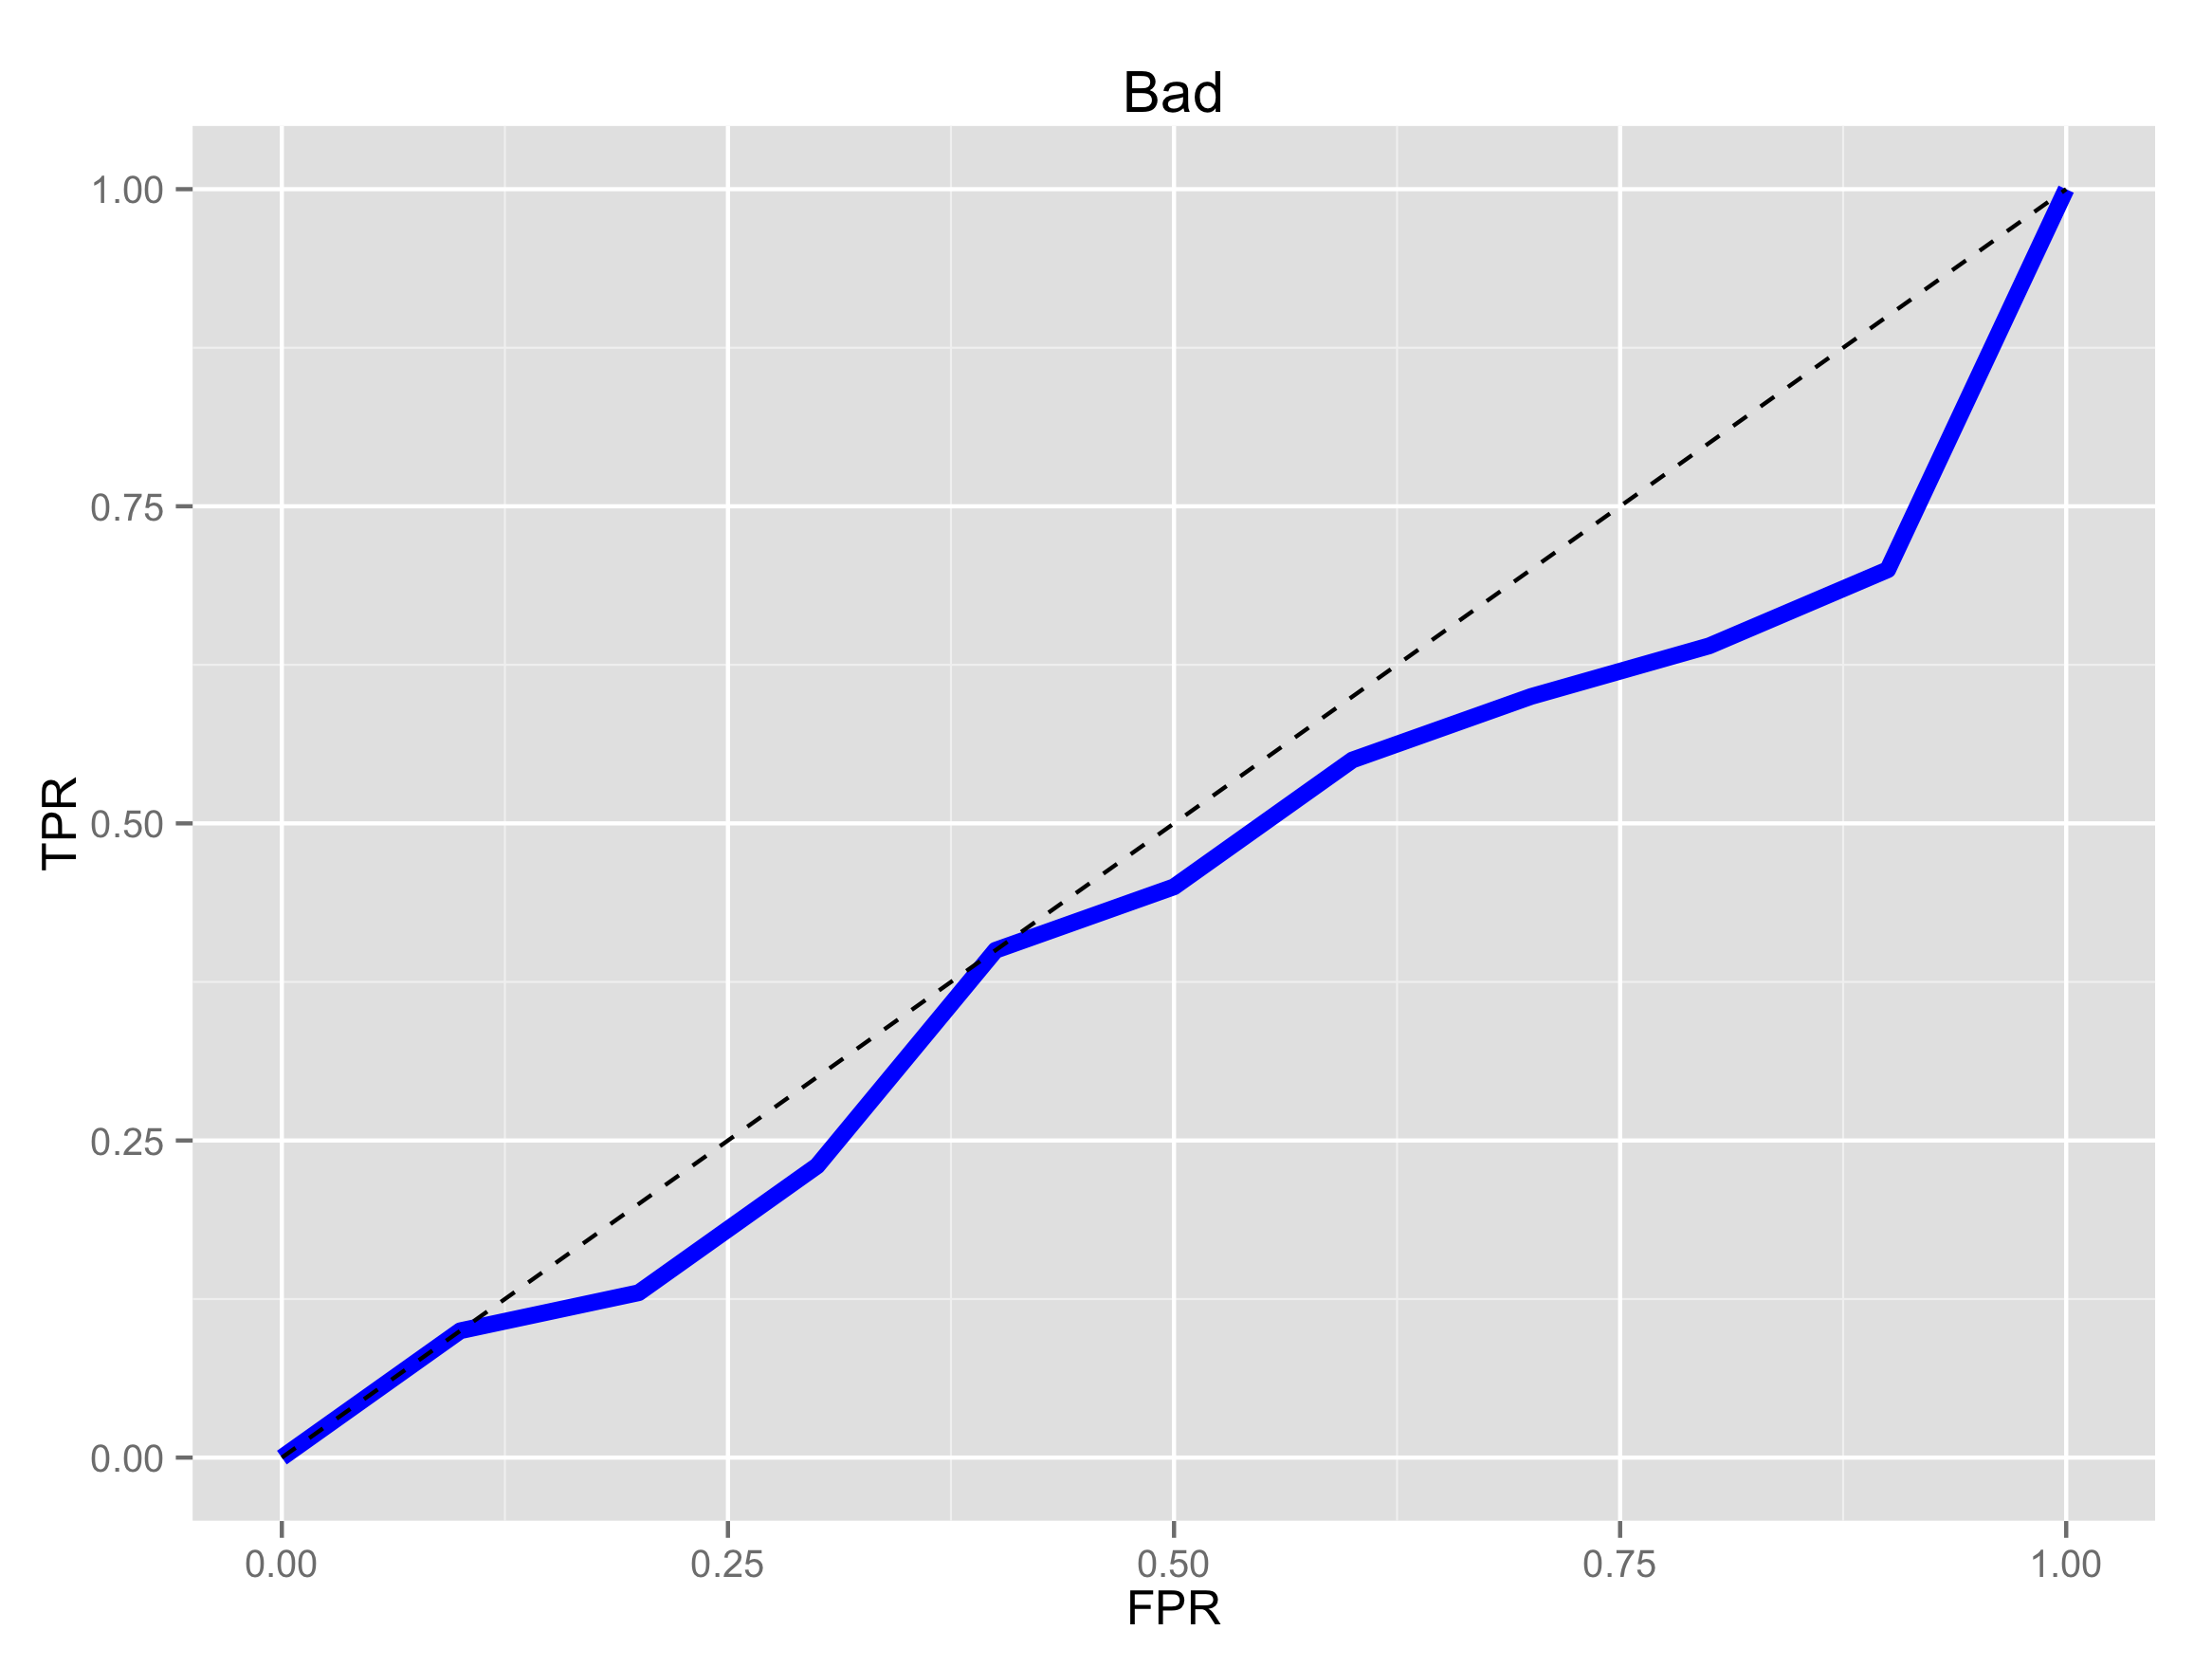

In [28]:
from IPython.display import Image
Image("data/roc-bad.jpg")

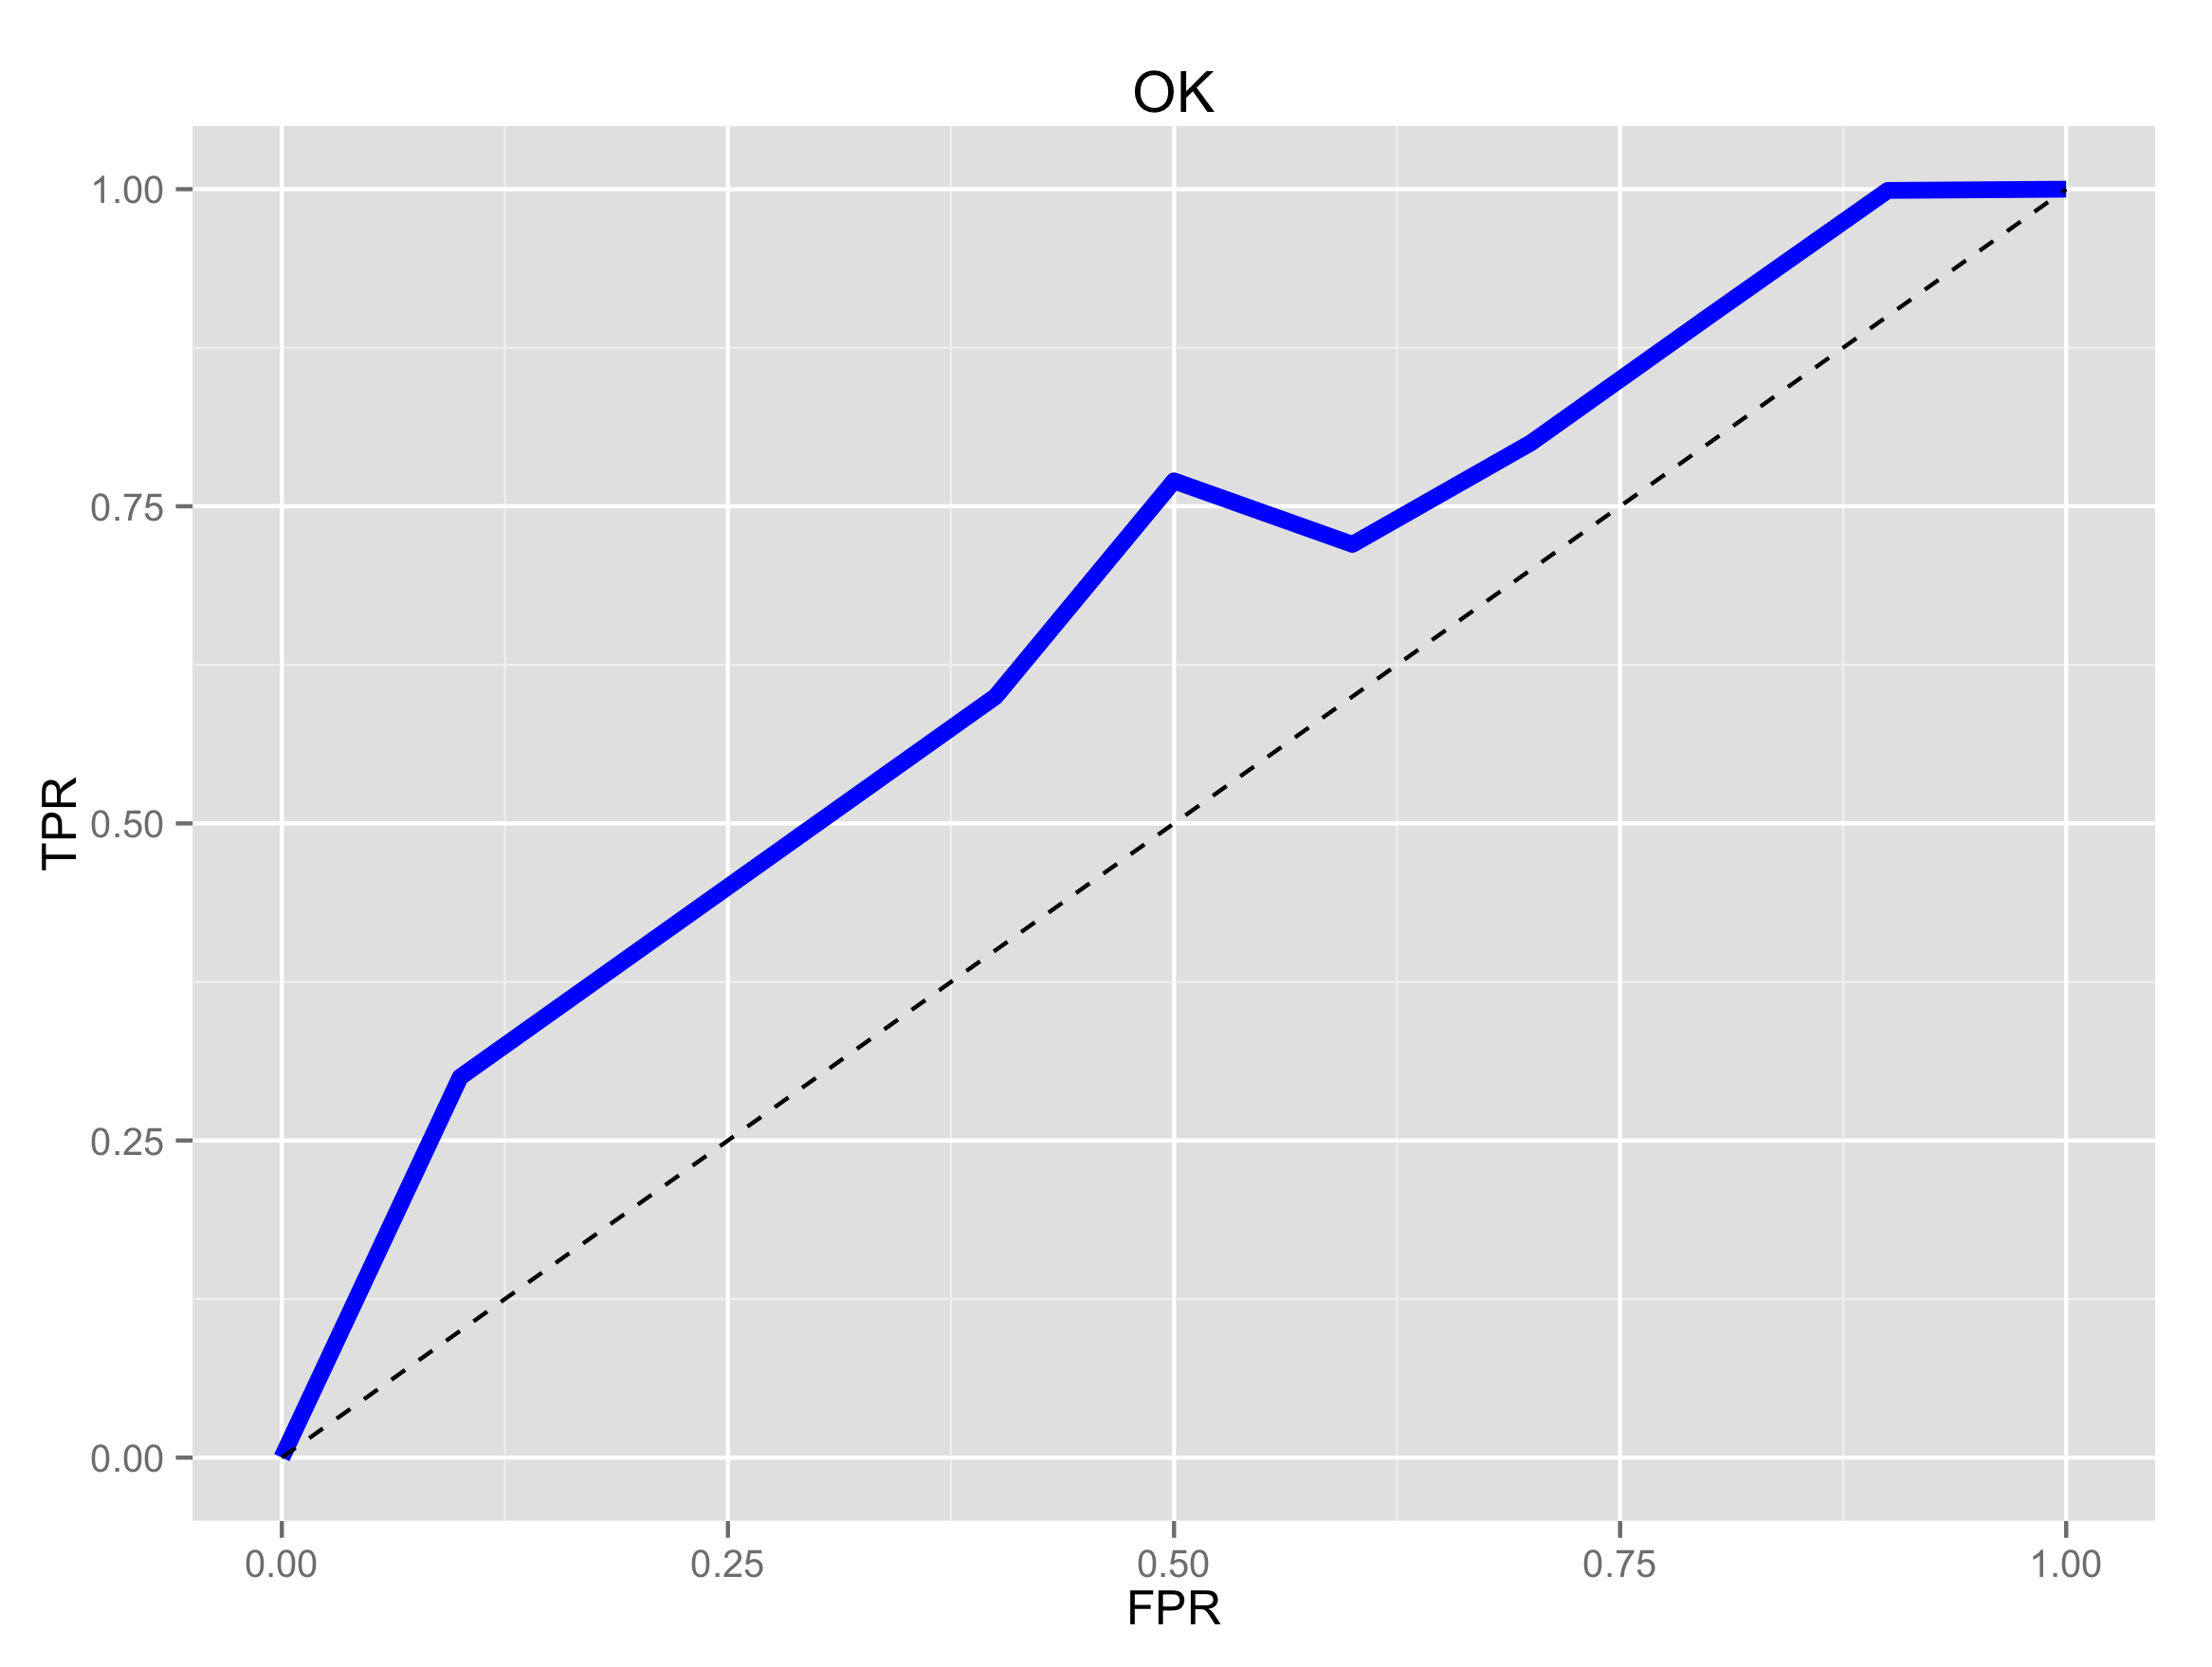

In [29]:
from IPython.display import Image
Image("data/roc-ok.jpg")

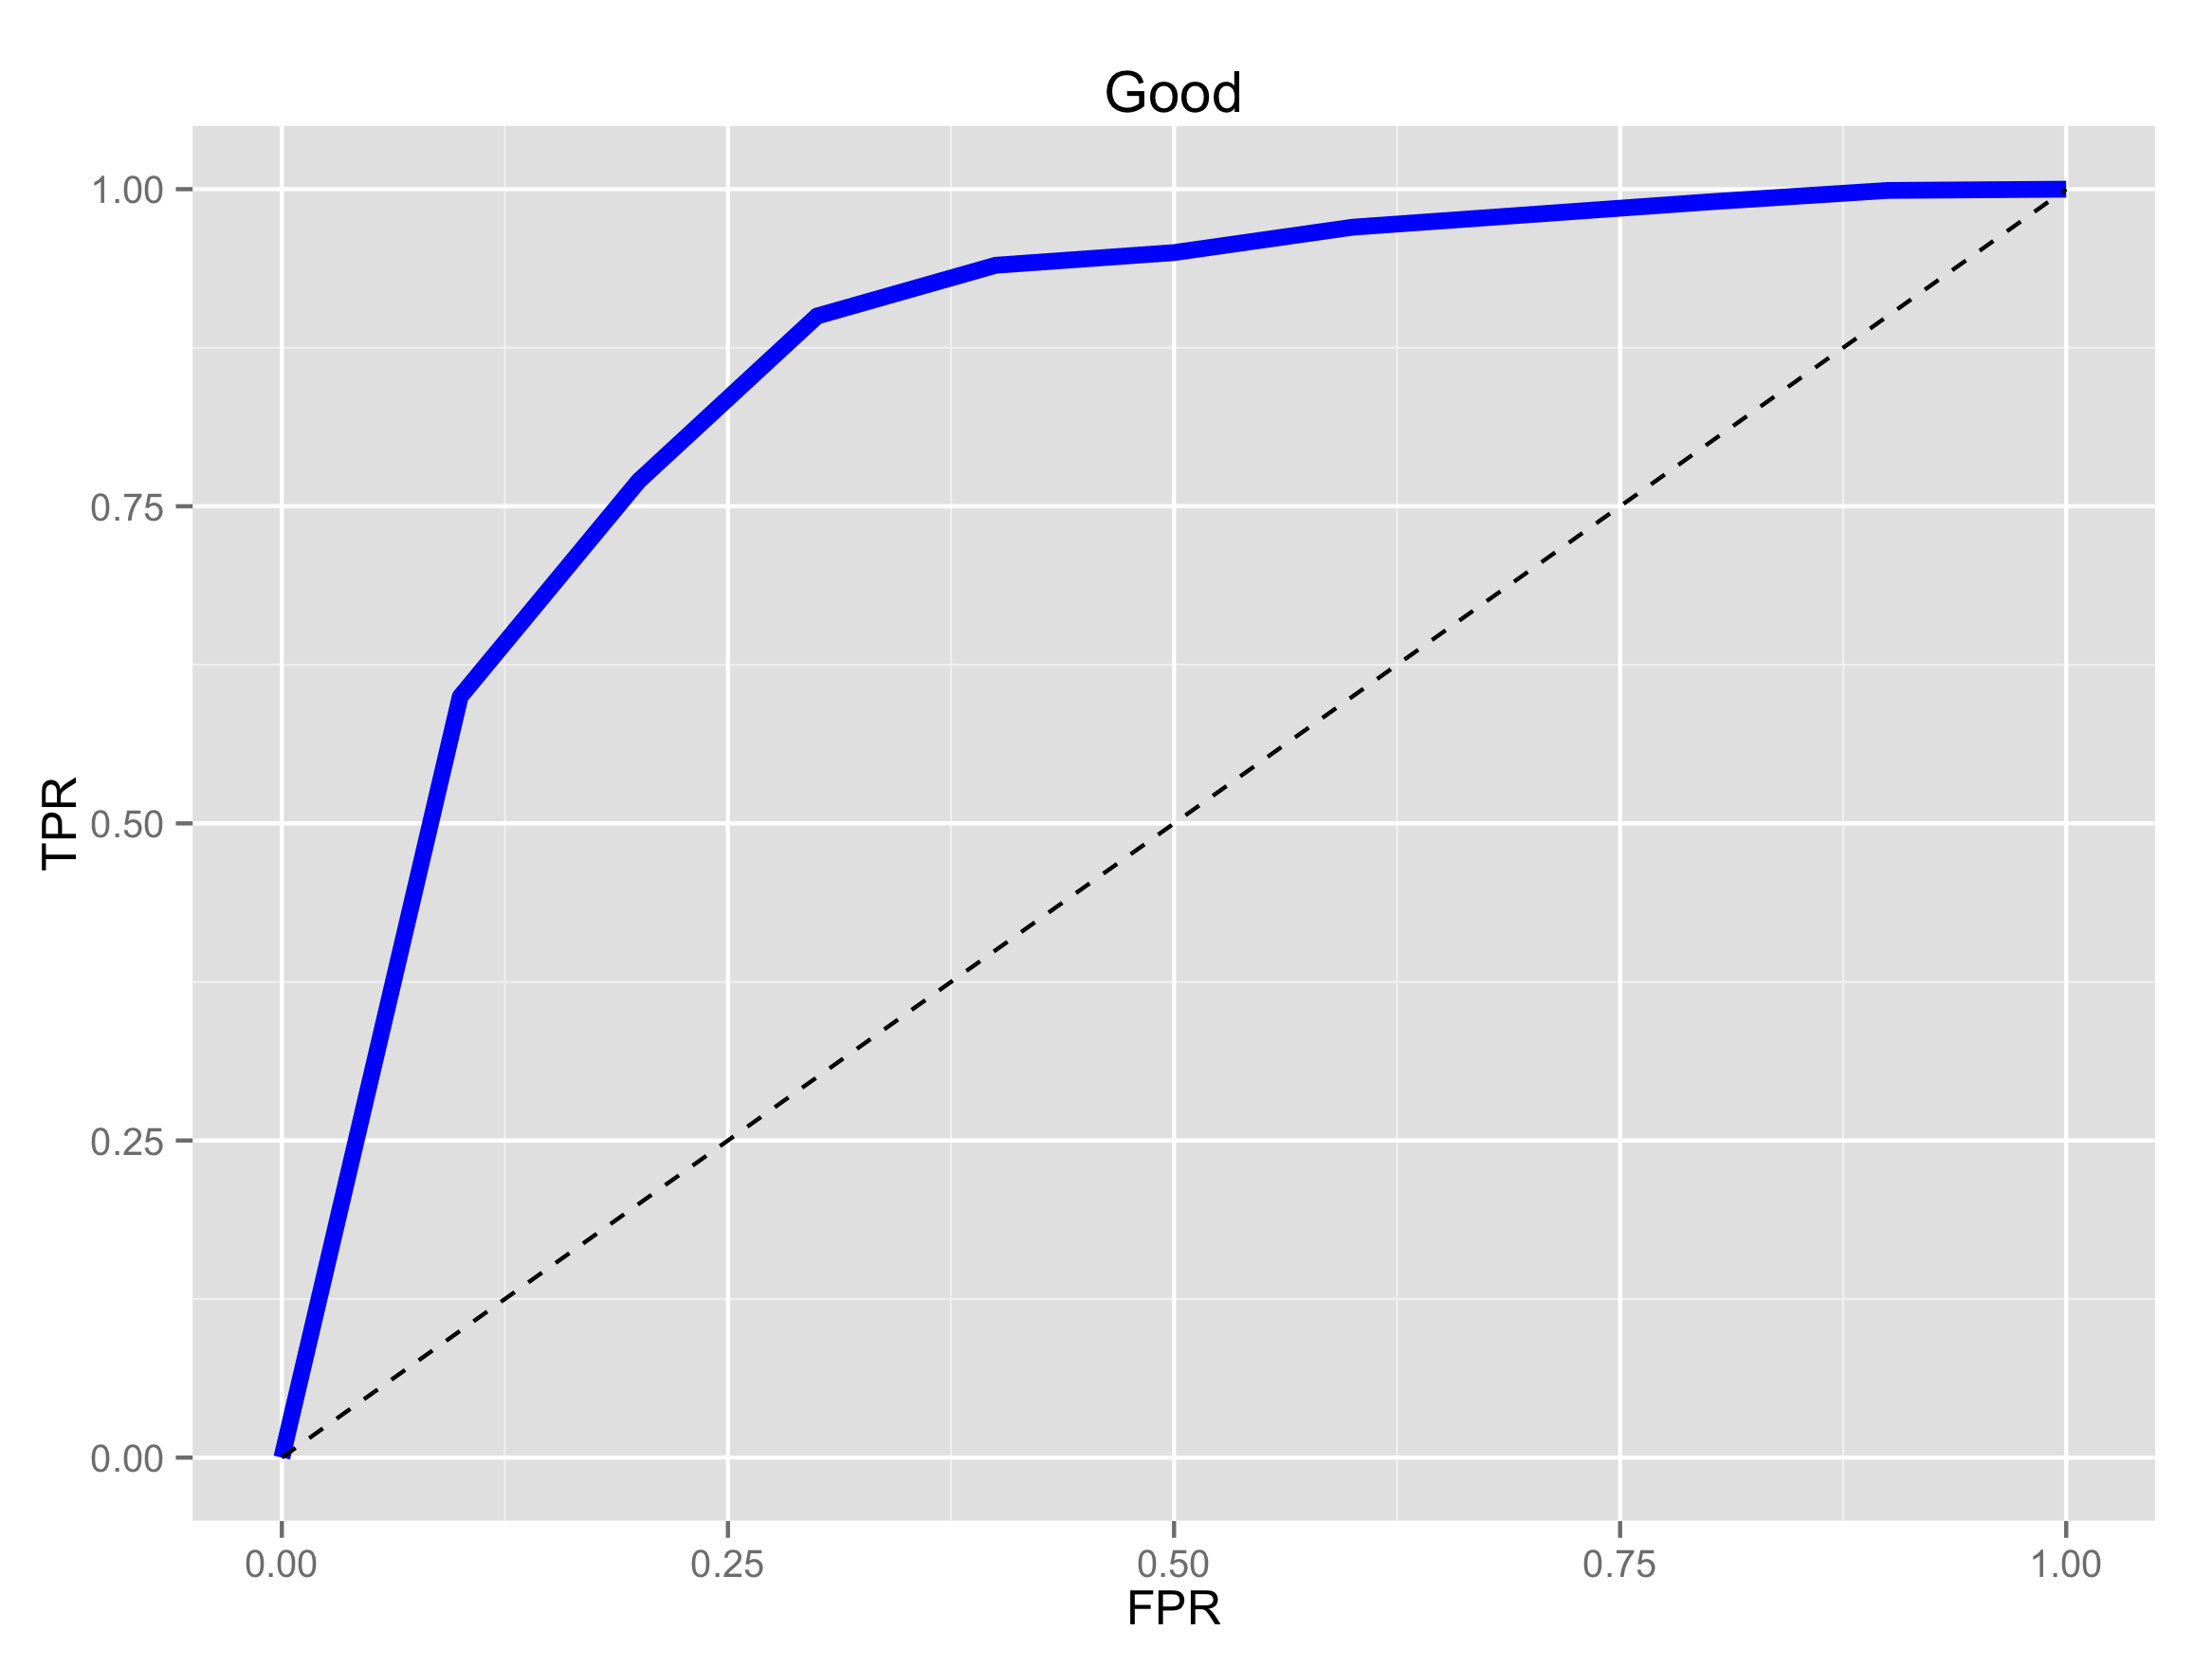

In [30]:
from IPython.display import Image
Image("data/roc-pretty-good.jpg")

### How to create your own ROC Curve:

In [31]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

X, y = make_classification(n_samples=10000, n_features=10, n_classes=2, n_informative=5)
Xtrain = X[:9000]
Xtest = X[9000:]
ytrain = y[:9000]
ytest = y[9000:]

clf = LogisticRegression()
clf.fit(Xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

/Users/vinecia1/anaconda2/lib/python2.7/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/vinecia1/anaconda2/lib/python2.7/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/Users/vinecia1/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


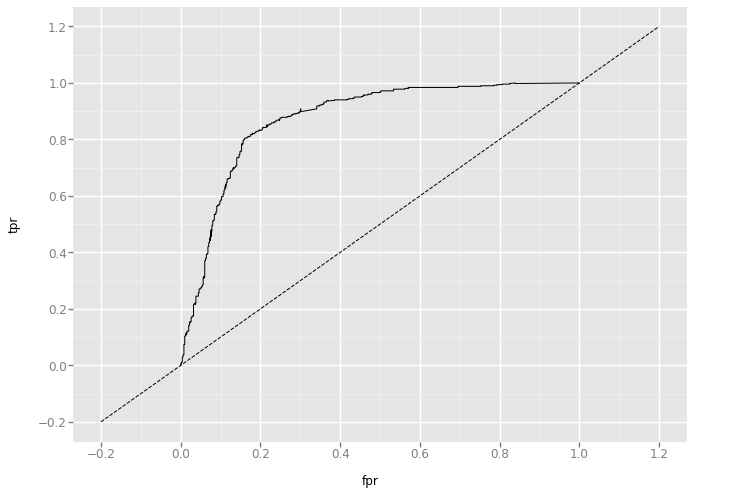

<ggplot: (7247682341)>

In [32]:
from sklearn import metrics
import pandas as pd
from ggplot import *

preds = clf.predict_proba(Xtest)[:,1]
fpr, tpr, _ = metrics.roc_curve(ytest, preds)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

### How to calculate your own AUC Score:

In [33]:
## how to predict the AUC Score

import numpy as np
from sklearn.metrics import roc_auc_score

roc_auc_score(ytest, clf.predict(Xtest))

0.8190411046576744

### Area Under the Curve:  (AUC)

It puts a wholistic number between tpr and fpr.   The more up and to the left the curve is - the more area AUC - and the BETTER your classifier is.  

# SUMMARY

Using GoogleNews Vectors database I walked through different comparison techniques using word2ved and doc2vec that can be extrapulated to make educated catagorizations of sets of data.

I explored t-SNE and its capabilities and limitations for summarizing and displaying large amounts of data.

Introduction to ROC Curves,  reading them,  creating them, and calculating the AUC score.

I hope that you were able to expand your knowledge using my tutorial!